# Harvey Weinstein Case Study

The bulk of the time I have spent working on this project has bee in data collection. Because I am collecting all of the data I'm using in this project and the the data I'm pulling becomes subsequently larger and larger, I've decided for the sake of time that it's best to focus the bulk of the analysis and visualization on a single abuser's network.

I chose Harvey Weinstein because the story about his abuse and harassment has been the catalyst for the wave of ousting Hollywood (and other industry) abusers now. I would like this case study to act as a proof of concept for the much larger dataset and visualization I began the project working toward.

## Contents

0. Set up all relevant data
    * create `df_weinstein_filmography`
    * create `df_weinstein_films`
    * create `df_weinstein_film_lookup`
    * create `df_weinstein_film_credits`
    * create `df_weinstein_person_filmography`
0. Join tables to create final datasets
    * import recently created CSVs
    * create `df_weinstein_film_table`
    * create `df_weinstein_person_summary_table`
0. Exploratory analysis
    * print summary stats
    * find connections to other abusers
0. Project visualization
    * import recently created CSVs
    * create remaining CSVs necessary for visualization 
        * create `df_weinstein_person_mapping `
    * create neo4j visualization

In [1]:
# Set up Python

import sys
import pandas as pd
import numpy as np
import csv
import json
import urllib
import requests
import re
import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Step 1

Set up all relevant data

### create `df_weinstein_filmography`

First, import `../data/abusers_filmography.csv`

In [3]:
# Import `abusers_filmography.csv`

filmography = pd.read_csv('../data/abusers_filmography.csv')
filmography.head()

,imdb_id,name,role,title,type,url,year
0,tt0368008,Al Franken,actor,The Manchurian Candidate,Film,http://www.imdb.com/title/tt0368008/,2004
1,tt0120570,Al Franken,actor,From the Earth to the MoonCan We Do This?,Film,http://www.imdb.com/title/tt0120570/,1998
2,tt0167880,Al Franken,actor,The Definite Maybe,Film,http://www.imdb.com/title/tt0167880/,1997
3,tt0114571,Al Franken,actor,Stuart Saves His Family,Film,http://www.imdb.com/title/tt0114571/,1995
4,tt0111693,Al Franken,actor,When a Man Loves a Woman,Film,http://www.imdb.com/title/tt0111693/,1994


Then, create `df_weinstein_filmography`

In [315]:
# Filter for 'Harvey Weinstein'

df_weinstein_filmography = filmography[filmography.name == 'Harvey Weinstein']
df_weinstein_filmography.reset_index()

df_weinstein_filmography.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295 entries, 2784 to 3078
Data columns (total 7 columns):
imdb_id    295 non-null object
name       295 non-null object
role       295 non-null object
title      295 non-null object
type       295 non-null object
url        295 non-null object
year       295 non-null int64
dtypes: int64(1), object(6)
memory usage: 18.4+ KB


In [ ]:
# Create new CSV from `df_weinstein_filmography` dataframe

df_weinstein_filmography.to_csv('../data/weinstein_filmography.csv', index = False)

### create `df_weinstein_films`
Clean up the dataframe

In [109]:
# Create condensed dataframe

df_weinstein_films = df_weinstein_filmography.drop(['name', 'role', 'type', 'url'], axis = 1)

# Remove rows where 'year' > 2017

df_weinstein_films = df_weinstein_films[df_weinstein_films.year <= 2017]

# Drop duplicates if there are any

df_weinstein_films.drop_duplicates(['imdb_id'], keep = 'first', inplace = True)

# Drop rows that are improperly categorized as films (mostly TV movies)

drop_ids = ['tt7293240', 
            'tt6760366', 
            'tt5276910', 
            'tt3910804', 
            'tt0146422', 
            'tt1497626', 
            'tt0471028', 
            'tt0134026']

df_weinstein_films = df_weinstein_films[~df_weinstein_films['imdb_id'].isin(drop_ids)]

df_weinstein_films.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 2784 to 3076
Data columns (total 3 columns):
imdb_id    282 non-null object
title      282 non-null object
year       282 non-null int64
dtypes: int64(1), object(2)
memory usage: 8.8+ KB


In [312]:
df_weinstein_films.head()

,imdb_id,title,year
2784,tt0484500,My Scene Goes Hollywood: The Movie,2005
2785,tt0118577,An Alan Smithee Film: Burn Hollywood Burn,1997
2786,tt0271527,The Gnomes' Great Adventure,1987
2787,tt0091767,Playing for Keeps,1986
2790,tt2140507,The Current War,2017
2791,tt1987680,The Upside,2017
2793,tt0491203,Tulip Fever,2017
2794,tt1935897,Amityville: The Awakening,2017
2795,tt2932536,47 Meters Down,2017
2797,tt6133034,TIME: The Kalief Browder StoryPart 2 - The Isl...,2017


In [314]:
# Create new CSV from `df_weinstein_films` dataframe

df_weinstein_films.to_csv('../data/weinstein_films.csv', index = False)

### create `df_weinstein_film_lookup`

Need to do this because `../data/imdb_moviedb_id_lookup.csv` results in many NaN values, possibly because an error broke the original loop.

In [110]:
# Create `weinstein_films_list` from 'imdb_id'

weinstein_films_list = df_weinstein_films['imdb_id'].tolist()

In [111]:
# Loop through `weinstein_films_list` to create dictionary for corresponding MovieDB API URLs

moviedb_id = "https://api.themoviedb.org/3/movie/"
moviedb_key = '21acf1b7274aa72fe97cd9acc7eb382a'

weinstein_moviedb_urls = {}
for i in weinstein_films_list:
    moviedb_url = moviedb_id + i + "?" + urllib.parse.urlencode({'api_key': moviedb_key}) + "&external_source=imdb_id"
    
    # Create `weinstein_moviedb_urls` dictionary
    
    weinstein_moviedb_urls[i] = moviedb_url

# debugging: weinstein_moviedb_urls

In [284]:
# Send `weinstein_moviedb_urls` values to list

moviedb_urls = list(weinstein_moviedb_urls.values())

In [305]:
# Loop through `moviedb_urls` to write `weinstein_film_lookup` dictionary

weinstein_film_lookup = {}
for e, u in enumerate(moviedb_urls):
    
    # Get past API request limit of 40 requests per 10 seconds this way
    
    if e % 20 == 0:
        time.sleep(5)
    
    moviedb_json = [requests.get(u).json()]
    
    # Create `weinstein_film_lookup` dictionary
    
    try:
        imdb_id = moviedb_json[0]['imdb_id']
        moviedb_id = moviedb_json[0]['id']
    except KeyError:
        pass
        
    weinstein_film_lookup[imdb_id] = moviedb_id

# debugging: weinstein_film_lookup

In [223]:
# Create dataframe of `df_film_id_lookup` from `film_id_lookup`

df_weinstein_film_lookup = pd.DataFrame(list(weinstein_film_lookup.items()), columns = ['imdb_id', 'moviedb_id'])

# debugging: df_weinstein_film_lookup

In [224]:
# Create new CSV from `df_weinstein_film_lookup` dataframe

df_weinstein_film_lookup.to_csv('../data/weinstein_film_lookup.csv', index = False)

### create `df_weinstein_film_credits`

First set up the dataframe

In [154]:
# Re-configure MovieDB API access information

moviedb_id = "https://api.themoviedb.org/3/movie/"
moviedb_key = '21acf1b7274aa72fe97cd9acc7eb382a'

In [177]:
# Create dataframe with placeholder data that will be filtered out later

placeholder_credits = {'moviedb_id': '0000',
                       'person_id': '0000',
                       'name': 'test',
                       'gender': '0',
                       'role': 'test'}
    
df_credits = pd.DataFrame(placeholder_credits, index = [0])

df_credits

,gender,moviedb_id,name,person_id,role
0,0,0000,test,0000,test


In [178]:
# Loop through `weinstein_film_lookup` to pull full credits for each film

for i, m in weinstein_film_lookup.items():
    credits_url = moviedb_id + str(m) + "/credits?" + urllib.parse.urlencode({'api_key': moviedb_key})
    credits_json = requests.get(credits_url).json()
    
    # Parse JSON and set to DataFrame
    
    try:
        cast = pd.DataFrame(credits_json['cast']).assign(moviedb_id = lambda x: credits_json['id'],\
                                                         role = lambda x: 'Actor')
        cast = cast.rename(columns = {'id': 'person_id'})
        df_credits = df_credits.append(cast, ignore_index = True)
        crew = pd.DataFrame(credits_json['crew']).assign(moviedb_id = lambda x: credits_json['id'])
        crew = crew.rename(columns = {'job': 'role', 'id': 'person_id'})
        df_credits = df_credits.append(crew, ignore_index = True)
    except KeyError:
        pass

df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6806 entries, 0 to 6805
Data columns (total 11 columns):
cast_id         3060 non-null float64
character       3060 non-null object
credit_id       6805 non-null object
department      3745 non-null object
gender          6806 non-null object
moviedb_id      6806 non-null object
name            6806 non-null object
order           3060 non-null float64
person_id       6806 non-null object
profile_path    3368 non-null object
role            6806 non-null object
dtypes: float64(2), object(9)
memory usage: 585.0+ KB


Next, clean the dataframe

In [186]:
# Create new dataframe from `df_credits` to only keep rows with relevant credits

df_weinstein_film_credits = df_credits[(df_credits.role == 'Actor') |\
                                       (df_credits.role == 'Director') |\
                                       (df_credits.role == 'Executive Producer') |\
                                       (df_credits.role == 'Producer') |\
                                       (df_credits.role == 'Screenplay')]

# Drop extraneous columns

df_weinstein_film_credits = df_weinstein_film_credits.drop(['cast_id', 'character',\
                                                            'credit_id', 'department',\
                                                            'order', 'profile_path'], axis = 1)

# Drop duplicate rows in case there are any

df_weinstein_film_credits.drop_duplicates(['moviedb_id', 'person_id', 'role'], keep = 'first')

# Re-order columns

df_weinstein_film_credits = df_weinstein_film_credits[['moviedb_id', 'person_id',\
                                                       'name', 'role', 'gender']]

df_weinstein_film_credits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3966 entries, 1 to 6800
Data columns (total 5 columns):
moviedb_id    3966 non-null object
person_id     3966 non-null object
name          3966 non-null object
role          3966 non-null object
gender        3966 non-null object
dtypes: object(5)
memory usage: 185.9+ KB


In [190]:
# Create new CSV from `df_weinstein_film_credits` dataframe

df_weinstein_film_credits.to_csv('../data/weinstein_film_credits.csv', index = False)

### create `df_weinstein_person_filmography`

First, create a cast/crew lookup of IMDb IDs that correspond to MovieDB IDs

<div class="alert alert-block alert-info">
#### Exception Alert!

If kernel needs to be re-run, start with next cell. Otherwise, skip cell.

In [30]:
# Import `weinstein_film_credits.csv`

df_weinstein_film_credits = pd.read_csv('../data/weinstein_film_credits.csv')
df_weinstein_film_credits.head()

,moviedb_id,person_id,name,role,gender
0,78149,18897,Jackie Chan,Actor,2
1,78149,16483,Sylvester Stallone,Actor,2
2,78149,2395,Whoopi Goldberg,Actor,1
3,78149,10713,Eric Idle,Actor,2
4,78149,31070,Ryan O'Neal,Actor,2


In [31]:
# Create list of MovieDB person IDs from `df_weinstein_film_credits`

weinstein_person_ids = df_weinstein_film_credits['person_id'].tolist()

# De-duplicate list

weinstein_person_ids = list(set(weinstein_person_ids))

In [35]:
# Re-configure MovieDB API access information

moviedb_person = "https://api.themoviedb.org/3/person/"
moviedb_key = '21acf1b7274aa72fe97cd9acc7eb382a'

In [36]:
# Loop through `weinstein_person_ids` to corresponding IMDb ID for each person

weinstein_person_lookup = {}
for e, i in enumerate(weinstein_person_ids):
    person_url = moviedb_person + str(i) + '?' + urllib.parse.urlencode({'api_key': moviedb_key})
    
    # Get past API request limit of 40 requests per 10 seconds this way
    
    if e % 20 == 0:
        time.sleep(5)
        
    person_json = requests.get(person_url).json()
    
    # Parse JSON and set to dictionary
    
    try:
        imdb_id = person_json['imdb_id']
    except KeyError:
        pass
    weinstein_person_lookup[i] = imdb_id

# debugging: weinstein_person_lookup

In [39]:
# Drop dictionary entries where value is empty:

weinstein_person_lookup = {k:v for k, v in weinstein_person_lookup.items() if v}

# debugging: weinstein_person_lookup

In [41]:
# Create dataframe of `df_weinstein_person_lookup` from `weinstein_person_lookup`

df_weinstein_person_lookup = pd.DataFrame(list(weinstein_person_lookup.items()), columns = ['moviedb_id', 'imdb_id'])

# debugging: df_weinstein_person_lookup

In [43]:
# Create new CSV from `df_weinstein_person_lookup` dataframe

df_weinstein_person_lookup.to_csv('../data/weinstein_person_lookup.csv', index = False)

Then, create a dataframe of cast/crew filmography

<div class="alert alert-block alert-info">
#### Exception Alert!

If kernel needs to be re-run, start here to import `weinstein_person_lookup`. Otherwise, skip next 2 cells.

In [3]:
# Import `weinstein_person_lookup`

df_weinstein_person_lookup = pd.read_csv('../data/weinstein_person_lookup.csv')
df_weinstein_person_lookup.head()

,moviedb_id,imdb_id
0,57345,nm0309348
1,2,nm0000434
2,3,nm0000148
3,4,nm0000402
4,122889,nm2851530


In [6]:
# Create `weinstein_person_lookup` dictionary

weinstein_person_lookup = dict(zip(df_weinstein_person_lookup['moviedb_id'], df_weinstein_person_lookup['imdb_id']))

In [7]:
# Create a list of roles we care about from IMDb API

roles = ['actor', 'actress', 'director', 'producer', 'writer']

# Set IMDb API access information

imdb_person_id = "http://www.theimdbapi.org/api/person?"
imdb_person_name = "http://www.theimdbapi.org/api/find/person?"

In [8]:
# Create dataframe with placeholder data that will be filtered out later

placeholder_filmography = {'imdb_id': 'tt0000000',
                           'title': 'test',
                           'type': 'test',
                           'url': 'http://www.test.com/',
                           'year': '2017',
                           'person_id': 'nm0000000',
                           'role': 'test'}

df_person_films = pd.DataFrame(placeholder_filmography, index = [0])

In [9]:
# Loop through `weinstein_person_lookup` to create dictionary of IMDb API URLs

person_urls = {}
for m, i in weinstein_person_lookup.items():
    urls = imdb_person_id + urllib.parse.urlencode({'person_id': i})
    
    # Create `person_urls` dictionary
    
    person_urls[i] = urls

# debugging: person_urls

In [13]:
# Loop through `person_urls` dictionary and `roles` list to access IMDb API data and append to `df_person_films`

for i, url in person_urls.items():
    person_json = [requests.get(url).json()]
    id_errors = []
    for r in roles:
        try:
            df_person_temp = pd.DataFrame(person_json[0]['filmography'][r]).assign(person_id = lambda x: i, role = lambda x: r)
            df_person_films = df_person_films.append(df_person_temp, ignore_index = True)
        except KeyError:
            pass
        except JSONDecodeError:
            id_errors = id_errors.append(i)
            print(url)
            pass

df_person_films.info()

KeyboardInterrupt: 

In [14]:
# Check errors

id_errors

[]

In [15]:
df_person_films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32123 entries, 0 to 32122
Data columns (total 7 columns):
imdb_id      32123 non-null object
person_id    32123 non-null object
role         32123 non-null object
title        32123 non-null object
type         32123 non-null object
url          32123 non-null object
year         32123 non-null object
dtypes: object(7)
memory usage: 1.7+ MB


<div class="alert alert-block alert-info">
#### Exception Alert! 

If for loop breaks (due to KeyboardInterrupt or other error), run the next 3 cells. It's set up to be re-run in case the loop breaks again.

In [32]:
# Set 'person_id' column to list

person_ids_cont_1 = df_person_films['person_id'].tolist()

# Deduplicate list

person_ids_cont_1 = list(set(person_ids_cont_1))

In [34]:
# Copy `person_urls` dicitonary

person_urls_cont_1 = person_urls

for key in person_ids_cont_1:
    if key in person_urls_cont_1:
        del person_urls_cont_1[key]
        
# Debugging: person_urls_cont_1

In [38]:
# Loop through `person_urls_cont_1` dictionary and `roles` list to access IMDb API data and append to `df_person_films`

for i, url in person_urls_cont_1.items():
    person_json = [requests.get(url).json()]
    id_errors = []
    for r in roles:
        try:
            df_person_temp = pd.DataFrame(person_json[0]['filmography'][r]).assign(person_id = lambda x: i, role = lambda x: r)
            df_person_films = df_person_films.append(df_person_temp, ignore_index = True)
        except KeyError:
            pass
        except JSONDecodeError:
            id_errors = id_errors.append(i)
            print(url)
            pass

df_person_films.info()

KeyboardInterrupt: 

In [39]:
df_person_films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162021 entries, 0 to 162020
Data columns (total 7 columns):
imdb_id      162021 non-null object
person_id    162021 non-null object
role         162021 non-null object
title        162021 non-null object
type         162021 non-null object
url          162021 non-null object
year         162021 non-null object
dtypes: object(7)
memory usage: 8.7+ MB


<div class="alert alert-block alert-info"> If code didn't break, continue here:

In [40]:
# Create new dataframe from `df_person_films` where type is "Film" (also deletes test row)

df_person_filmography = df_person_films[df_person_films.type == 'Film']

# Drop duplicate rows in case there are any

df_person_filmography.drop_duplicates(['imdb_id', 'person_id', 'role'], keep = 'first')

# Drop rows where year is NaN as those films are on hold or have not yet been released

df_person_filmography.dropna(subset=['year'])

# Remove extraneous characters from 'year'

df_person_filmography['year'] = df_person_filmography['year'].astype(str).apply(lambda x: x[:4])

df_person_filmography.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101897 entries, 1 to 162020
Data columns (total 7 columns):
imdb_id      101897 non-null object
person_id    101897 non-null object
role         101897 non-null object
title        101897 non-null object
type         101897 non-null object
url          101897 non-null object
year         101897 non-null object
dtypes: object(7)
memory usage: 6.2+ MB


/Users/206886/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [41]:
# Create new CSV from `df_person_filmography_clean` dataframe

df_person_filmography.to_csv('../data/weinstein_person_filmography.csv', index = False)

Step 1 complete!

# Step 2

Join tables to create relevant datasets

### import recently created CSVs

Let's start fresh by importing all of our CSVs and re-setting the relevant dataframes. 

In [42]:
# Import CSVs

weinstein_films = pd.read_csv('../data/weinstein_films.csv')
weinstein_filmography = pd.read_csv('../data/weinstein_filmography.csv') # File includes role and excluded titles
weinstein_film_credits = pd.read_csv('../data/weinstein_film_credits.csv')
weinstein_person_filmography = pd.read_csv('../data/weinstein_person_filmography.csv')

# Import lookup CSVs

weinstein_film_lookup = pd.read_csv('../data/weinstein_film_lookup.csv')
weinstein_person_lookup = pd.read_csv('../data/weinstein_person_lookup.csv')

### create `df_weinstein_film_table`

In [43]:
# Create `df_weinstein_film_table` by joining `weinstein_films` with `weinstein_filmography`

df_weinstein_film_table = pd.merge(weinstein_films, 
                                   weinstein_filmography[['imdb_id', 'role']], 
                                   on = 'imdb_id', 
                                   how = 'left')

df_weinstein_film_table.head()

,imdb_id,title,year,role
0,tt0484500,My Scene Goes Hollywood: The Movie,2005,actor
1,tt0118577,An Alan Smithee Film: Burn Hollywood Burn,1997,actor
2,tt0271527,The Gnomes' Great Adventure,1987,director
3,tt0091767,Playing for Keeps,1986,director
4,tt0091767,Playing for Keeps,1986,producer


### create `df_weinstein_person_summary_table`

In [44]:
# Create `person_film_counts` by running distinct counts for each 'person_id' in `weinstein_person_filmography`

df_weinstein_person_film_counts = pd.DataFrame(weinstein_person_filmography.groupby('person_id').imdb_id.nunique()).reset_index()

df_weinstein_person_film_counts = df_weinstein_person_film_counts.rename(columns = {'imdb_id': 'film_counts'})

df_weinstein_person_film_counts.head()

,person_id,film_counts
0,nm0000047,93
1,nm0000056,65
2,nm0000093,87
3,nm0000096,32
4,nm0000097,26


In [45]:
# Create `df_weintein_film_credits` by joining `weinstein_film_credits` to `weinstein_film_lookup` and `weinstein_person_lookup`

df_weinstein_film_credits = pd.merge(weinstein_film_credits, 
                                     weinstein_film_lookup, 
                                     on = 'moviedb_id', 
                                     how = 'left')

# Rename columns to join

df_weinstein_film_credits = df_weinstein_film_credits.rename(columns = {'person_id': 'person_moviedb_id'})

person_lookup_temp = weinstein_person_lookup.rename(columns = {'moviedb_id': 'person_moviedb_id', 'imdb_id': 'person_id'})

# Join `df_weinstein_film_credits` with `person_lookup_temp`

df_weinstein_film_credits = pd.merge(df_weinstein_film_credits, 
                                     person_lookup_temp, 
                                     on = 'person_moviedb_id', 
                                     how = 'left')

df_weinstein_film_credits.head()

,moviedb_id,person_moviedb_id,name,role,gender,imdb_id,person_id
0,78149,18897,Jackie Chan,Actor,2,tt0118577,nm0000329
1,78149,16483,Sylvester Stallone,Actor,2,tt0118577,nm0000230
2,78149,2395,Whoopi Goldberg,Actor,1,tt0118577,nm0000155
3,78149,10713,Eric Idle,Actor,2,tt0118577,nm0001385
4,78149,31070,Ryan O'Neal,Actor,2,tt0118577,nm0641939


In [46]:
# Create `person_weinstein_counts` by running distinct counts for each 'person_id' in `weinstein_person_filmography`

df_weinstein_person_project_counts = pd.DataFrame(df_weinstein_film_credits.groupby('person_id').imdb_id.nunique()).reset_index()

df_weinstein_person_project_counts =  df_weinstein_person_project_counts.rename(columns = {'imdb_id': 'weinstein_project_counts'})

df_weinstein_person_project_counts.head()

,person_id,weinstein_project_counts
0,nm0000047,1
1,nm0000056,1
2,nm0000093,3
3,nm0000096,1
4,nm0000097,1


<div class="alert alert-block alert-info">
#### Exception Alert!

Address unknown gender mapping. If re-starting kernels, skip to next cell!

In [68]:
# Create dataframe of people for gender lookup

weinstein_person_gender_lookup = df_weinstein_film_credits[['person_id', 'name', 'gender']]

weinstein_person_gender_lookup = weinstein_person_gender_lookup.drop_duplicates(['person_id'], keep = 'first')

# Create new CSV from `weinstein_person_gender_lookup` dataframe

weinstein_person_gender_lookup.to_csv('../data/weinstein_person_gender_lookup_incomplete.csv', index = False)

<div class="alert alert-block alert-info">Continue here if re-starting kernesls by re-importing `weinstein_person_gender_lookup_matched.csv` after manually updating gender values.

In [70]:
# Import `weinstein_person_gender_lookup_matched.csv`

df_weinstein_person_gender_lookup = pd.read_csv('../data/weinstein_person_gender_lookup_matched.csv', encoding = 'ISO-8859-1')

df_weinstein_person_gender_lookup.head()

,person_id,name,gender
0,nm0000329,Jackie Chan,2
1,nm0000230,Sylvester Stallone,2
2,nm0000155,Whoopi Goldberg,1
3,nm0001385,Eric Idle,2
4,nm0641939,Ryan O'Neal,2


In [72]:
# Create `df_weinstein_person_summary_table` by joining `df_weinstein_person_film_counts` to `df_weinstein_person_project_counts`

df_weinstein_person_summary_table = pd.merge(df_weinstein_person_film_counts, 
                                             df_weinstein_person_project_counts, 
                                             on = 'person_id', 
                                             how = 'left' )

# Join to `df_weinstein_person_gender_lookup`

df_weinstein_person_summary_table = pd.merge(df_weinstein_person_summary_table, 
                                             df_weinstein_person_gender_lookup, 
                                             on = 'person_id', 
                                             how = 'left')

df_weinstein_person_summary_table = df_weinstein_person_summary_table[['person_id', 'name', 'gender',\
                                                                       'film_counts', 'weinstein_project_counts']]

df_weinstein_person_summary_table.head()

,person_id,name,gender,film_counts,weinstein_project_counts
0,nm0000047,Sophia Loren,1,93,1
1,nm0000056,Paul Newman,2,65,1
2,nm0000093,Brad Pitt,2,87,3
3,nm0000096,Gillian Anderson,1,32,1
4,nm0000097,Pamela Anderson,1,26,1


In [74]:
# Add column dividing 'weinstein_project_counts' by 'film_counts'

df_weinstein_person_summary_table['weinstein_percentage'] = 100.00 * np.round(df_weinstein_person_summary_table['weinstein_project_counts'] / df_weinstein_person_summary_table['film_counts'], 4)

df_weinstein_person_summary_table.head()

,person_id,name,gender,film_counts,weinstein_project_counts,weinstein_percentage
0,nm0000047,Sophia Loren,1,93,1,1.08
1,nm0000056,Paul Newman,2,65,1,1.54
2,nm0000093,Brad Pitt,2,87,3,3.45
3,nm0000096,Gillian Anderson,1,32,1,3.12
4,nm0000097,Pamela Anderson,1,26,1,3.85


In [89]:
# Remove Harvey Weinstein from `df_weinstein_person_summary_table`

df_weinstein_person_summary_table = df_weinstein_person_summary_table.loc[df_weinstein_person_summary_table['person_id'] != 'nm0005544']

df_weinstein_person_summary_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2868 entries, 0 to 2868
Data columns (total 7 columns):
person_id                   2868 non-null object
name                        2868 non-null object
gender                      2868 non-null int64
film_counts                 2868 non-null int64
weinstein_project_counts    2868 non-null int64
weinstein_percentage        2868 non-null float64
is_abuser                   2868 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 179.2+ KB


Import original `hollywood_abusers_list.csv` to add whether each person in `df_weinstein_person_summary_table` is known or accused abuser.

In [76]:
# Import `hollywood_abusers_list.csv`

hollywood_abusers_list = pd.read_csv('../data/hollywood_abusers_list.csv')
hollywood_abusers_list.head()

,name,imdb_id,profession,abuse,victim_is_minor,deceased,source
0,Al Franken,nm0291253,Actor,sexual assault,0,0,http://www.kabc.com/2017/11/16/leeann-tweeden-...
1,Alec Baldwin,nm0000285,Actor,violent assault,0,0,http://articles.latimes.com/1995-10-27/local/m...
2,Alfred Hitchcock,nm0000033,Director,sexual assault,0,1,https://www.usatoday.com/story/life/books/2016...
3,Andrew Kreisberg,nm1132610,Producer,sexual harassment,0,0,http://www.cnn.com/2017/11/12/entertainment/an...
4,Andy Dick,nm0004873,Actor,sexual assault,0,0,http://www.nydailynews.com/entertainment/gossi...


In [77]:
# Assign value of 1 to everyone on list

hollywood_abusers_list['is_abuser'] = 1

hollywood_abusers_list.head()

,name,imdb_id,profession,abuse,victim_is_minor,deceased,source,is_abuser
0,Al Franken,nm0291253,Actor,sexual assault,0,0,http://www.kabc.com/2017/11/16/leeann-tweeden-...,1
1,Alec Baldwin,nm0000285,Actor,violent assault,0,0,http://articles.latimes.com/1995-10-27/local/m...,1
2,Alfred Hitchcock,nm0000033,Director,sexual assault,0,1,https://www.usatoday.com/story/life/books/2016...,1
3,Andrew Kreisberg,nm1132610,Producer,sexual harassment,0,0,http://www.cnn.com/2017/11/12/entertainment/an...,1
4,Andy Dick,nm0004873,Actor,sexual assault,0,0,http://www.nydailynews.com/entertainment/gossi...,1


In [78]:
abusers_temp = hollywood_abusers_list[['imdb_id', 'is_abuser']]

abusers_temp = abusers_temp.rename(columns = {'imdb_id': 'person_id'})

abusers_temp.head()

,person_id,is_abuser
0,nm0291253,1
1,nm0000285,1
2,nm0000033,1
3,nm1132610,1
4,nm0004873,1


In [93]:
# Add whether person in `abusers_temp` to `df_weinstein_person_summary_table`

df_weinstein_person_summary_table = pd.merge(df_weinstein_person_summary_table, 
                                             abusers_temp, 
                                             on = 'person_id', 
                                             how = 'left' )

df_weinstein_person_summary_table.head()

,person_id,name,gender,film_counts,weinstein_project_counts,weinstein_percentage,is_abuser
0,nm0000047,Sophia Loren,1,93,1,1.08,NaN
1,nm0000056,Paul Newman,2,65,1,1.54,NaN
2,nm0000093,Brad Pitt,2,87,3,3.45,NaN
3,nm0000096,Gillian Anderson,1,32,1,3.12,NaN
4,nm0000097,Pamela Anderson,1,26,1,3.85,NaN


In [94]:
# Fill NaN values (only in 'is_abuser') with 0

df_weinstein_person_summary_table = df_weinstein_person_summary_table.fillna(0)

# Convert 'is_abuser' to int64

df_weinstein_person_summary_table['is_abuser'] = df_weinstein_person_summary_table['is_abuser'].astype('int64')

df_weinstein_person_summary_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2868 entries, 0 to 2867
Data columns (total 7 columns):
person_id                   2868 non-null object
name                        2868 non-null object
gender                      2868 non-null int64
film_counts                 2868 non-null int64
weinstein_project_counts    2868 non-null int64
weinstein_percentage        2868 non-null float64
is_abuser                   2868 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 179.2+ KB


In [95]:
df_weinstein_person_summary_table.head()

,person_id,name,gender,film_counts,weinstein_project_counts,weinstein_percentage,is_abuser
0,nm0000047,Sophia Loren,1,93,1,1.08,0
1,nm0000056,Paul Newman,2,65,1,1.54,0
2,nm0000093,Brad Pitt,2,87,3,3.45,0
3,nm0000096,Gillian Anderson,1,32,1,3.12,0
4,nm0000097,Pamela Anderson,1,26,1,3.85,0


In [96]:
# Create new CSV from `df_weinstein_person_summary_table` dataframe

df_weinstein_person_summary_table.to_csv('../data/weinstein_person_summary_table.csv', index = False)

# Step 3

Exploratory analysis

## print summary stats

In [97]:
# Total numbr of Weinstein film projects

df_weinstein_film_table['imdb_id'].nunique()

282

In [98]:
# Total number of actors, directors, producers, writers involved with Weinstein film projects

df_weinstein_person_summary_table['person_id'].nunique()

2868

In [112]:
# Total number of (unique) films linked to these people

weinstein_person_filmography['imdb_id'].nunique()

46963

In [99]:
# Number of people who have only worked on Weinstein projects

df_weinstein_person_summary_table.loc[df_weinstein_person_summary_table['weinstein_percentage'] == 100.00].nunique()

person_id                   121
name                        121
gender                        2
film_counts                   2
weinstein_project_counts      2
weinstein_percentage          1
is_abuser                     1
dtype: int64

In [100]:
# Number of people who have worked on at least 5 Weinstein projects

df_weinstein_person_summary_table.loc[df_weinstein_person_summary_table['weinstein_project_counts'] >= 5].nunique()

person_id                   19
name                        19
gender                       2
film_counts                 17
weinstein_project_counts     3
weinstein_percentage        19
is_abuser                    2
dtype: int64

In [101]:
# Top 10 Weinstein collaborators

df_weinstein_person_summary_table.sort_values(by = ['weinstein_project_counts'], ascending = False).head(10)

,person_id,name,gender,film_counts,weinstein_project_counts,weinstein_percentage,is_abuser
2052,nm0918424,Bob Weinstein,2,289,68,23.53,0
38,nm0000173,Nicole Kidman,1,77,6,7.79,0
62,nm0000233,Quentin Tarantino,2,45,6,13.33,0
225,nm0001132,Judi Dench,1,78,6,7.69,0
323,nm0001675,Robert Rodriguez,2,41,6,14.63,0
1888,nm0812373,Joel Soisson,2,59,6,10.17,0
1306,nm0465298,Cathy Konrad,1,19,6,31.58,0
1086,nm0334665,Cary Granat,2,20,6,30.00,0
2112,nm0940531,Cary Woods,2,22,5,22.73,0
203,nm0000949,Cate Blanchett,1,60,5,8.33,0


In [102]:
# Collaborators by gender

df_weinstein_person_summary_table['gender'].value_counts()

2    1962
1     906
Name: gender, dtype: int64

In [103]:
# Mean 'film_counts' by gender

df_weinstein_person_summary_table.groupby('gender')['film_counts'].mean()

gender
1    27.407285
2    36.343017
Name: film_counts, dtype: float64

In [104]:
# Median 'film_counts' by gender

df_weinstein_person_summary_table.groupby('gender')['film_counts'].median()

gender
1    20
2    26
Name: film_counts, dtype: int64

In [105]:
# mean 'weinstein_project_counts' by gender

df_weinstein_person_summary_table.groupby('gender')['weinstein_project_counts'].mean()

gender
1    1.151214
2    1.220183
Name: weinstein_project_counts, dtype: float64

In [106]:
# Mean 'weinstein_percentage' by gender

df_weinstein_person_summary_table.groupby('gender')['weinstein_percentage'].mean()

gender
1    13.005684
2    11.615938
Name: weinstein_percentage, dtype: float64

In [107]:
# Median 'weinstein_percentage' by gender

df_weinstein_person_summary_table.groupby('gender')['weinstein_percentage'].median()

gender
1    5.56
2    4.55
Name: weinstein_percentage, dtype: float64

Men have more film credits overall than women and tend to work on more Weinstein projects than women but women are more likely to have a higher Weinstein project ratio than men.

## find connections to other abusers

In [108]:
# Number of other abusers who have worked on Weinstein projects

df_weinstein_person_summary_table.loc[df_weinstein_person_summary_table['is_abuser'] == 1].nunique()

person_id                   27
name                        27
gender                       2
film_counts                 22
weinstein_project_counts     4
weinstein_percentage        25
is_abuser                    1
dtype: int64

In [109]:
# Print abusers

df_weinstein_person_summary_table.loc[df_weinstein_person_summary_table['is_abuser'] == 1]

,person_id,name,gender,film_counts,weinstein_project_counts,weinstein_percentage,is_abuser
21,nm0000136,Johnny Depp,2,70,1,1.43,1
33,nm0000163,Dustin Hoffman,2,68,1,1.47,1
49,nm0000197,Jack Nicholson,2,68,1,1.47,1
59,nm0000228,Kevin Spacey,2,76,1,1.32,1
60,nm0000230,Sylvester Stallone,2,75,4,5.33,1
65,nm0000237,John Travolta,2,64,1,1.56,1
71,nm0000249,James Woods,2,101,1,0.99,1
73,nm0000255,Ben Affleck,2,66,5,7.58,1
78,nm0000288,Christian Bale,2,48,2,4.17,1
154,nm0000576,Sean Penn,2,64,2,3.12,1


# Step 4

Project visualization

### import recently created CSVs

Do this if you need to re-start the kernel.

In [4]:
# Import CSVs

weinstein_films = pd.read_csv('../data/weinstein_films.csv')
weinstein_filmography = pd.read_csv('../data/weinstein_filmography.csv') # File includes role and excluded titles
weinstein_film_credits = pd.read_csv('../data/weinstein_film_credits.csv')
weinstein_person_filmography = pd.read_csv('../data/weinstein_person_filmography.csv')
weinstein_person_summary_table = pd.read_csv('../data/weinstein_person_summary_table.csv')


# Import lookup CSVs

weinstein_film_lookup = pd.read_csv('../data/weinstein_film_lookup.csv')
weinstein_person_lookup = pd.read_csv('../data/weinstein_person_lookup.csv')

### create remaining CSVs

#### create `df_weinstein_person_mapping` to link each person to Harvey Weinstein

CSV mapping of each actor, director, producer, or writer to Weinstein.

In [5]:
# Create new dataframe from `weinstein_film_credits`

df_weinstein_person_mapping = weinstein_film_credits[['moviedb_id', 'person_id', 'name']]

# Drop duplicates

df_weinstein_person_mapping.drop_duplicates(['moviedb_id', 'person_id'], keep = 'first', inplace = True)

# Rename 'person_id' to 'moviedb_person_id'

df_weinstein_person_mapping = df_weinstein_person_mapping.rename(columns = {'person_id': 'moviedb_person_id'})

df_weinstein_person_mapping.head()

/Users/206886/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,moviedb_id,moviedb_person_id,name
0,78149,18897,Jackie Chan
1,78149,16483,Sylvester Stallone
2,78149,2395,Whoopi Goldberg
3,78149,10713,Eric Idle
4,78149,31070,Ryan O'Neal


In [6]:
# Add IMDb Movie IDs to `df_weinstein_person_mapping` by joining to `weinstein_film_lookup`

df_weinstein_person_mapping = pd.merge(df_weinstein_person_mapping, 
                                       weinstein_film_lookup, 
                                       on = 'moviedb_id', 
                                       how = 'left')

df_weinstein_person_mapping.head()

,moviedb_id,moviedb_person_id,name,imdb_id
0,78149,18897,Jackie Chan,tt0118577
1,78149,16483,Sylvester Stallone,tt0118577
2,78149,2395,Whoopi Goldberg,tt0118577
3,78149,10713,Eric Idle,tt0118577
4,78149,31070,Ryan O'Neal,tt0118577


In [7]:
# Create `person_lookup_temp` from `weinstein_person_lookup` with columns renamed

person_lookup_temp = weinstein_person_lookup.rename(columns = {'moviedb_id': 'moviedb_person_id', 
                                                               'imdb_id': 'person_id'})

# Add IMDb 'person_id' to `df_weinstein_person_mapping` by joining to `person_lookup_temp`

df_weinstein_person_mapping = pd.merge(df_weinstein_person_mapping, 
                                       person_lookup_temp, 
                                       on = 'moviedb_person_id', 
                                       how = 'left')

df_weinstein_person_mapping.head()

,moviedb_id,moviedb_person_id,name,imdb_id,person_id
0,78149,18897,Jackie Chan,tt0118577,nm0000329
1,78149,16483,Sylvester Stallone,tt0118577,nm0000230
2,78149,2395,Whoopi Goldberg,tt0118577,nm0000155
3,78149,10713,Eric Idle,tt0118577,nm0001385
4,78149,31070,Ryan O'Neal,tt0118577,nm0641939


In [8]:
# Create `person_filmography_temp` from `weinstein_person_filmography`

person_filmography_temp = weinstein_person_filmography[['imdb_id', 'title', 'url', 'year']]

# Drop duplicates

person_filmography_temp.drop_duplicates(['imdb_id'], keep = 'first', inplace = True)

person_filmography_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46963 entries, 0 to 101896
Data columns (total 4 columns):
imdb_id    46963 non-null object
title      46963 non-null object
url        46963 non-null object
year       46056 non-null float64
dtypes: float64(1), object(3)
memory usage: 1.8+ MB


/Users/206886/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [9]:
# Add IMDb 'person_id' to `df_weinstein_person_mapping` by joining to `weinstein_person_filmography`

df_weinstein_person_mapping = pd.merge(df_weinstein_person_mapping, 
                                       person_filmography_temp, 
                                       on = 'imdb_id', 
                                       how = 'left')

df_weinstein_person_mapping.head()

,moviedb_id,moviedb_person_id,name,imdb_id,person_id,title,url,year
0,78149,18897,Jackie Chan,tt0118577,nm0000329,An Alan Smithee Film: Burn Hollywood Burn,http://www.imdb.com/title/tt0118577/,1997.0
1,78149,16483,Sylvester Stallone,tt0118577,nm0000230,An Alan Smithee Film: Burn Hollywood Burn,http://www.imdb.com/title/tt0118577/,1997.0
2,78149,2395,Whoopi Goldberg,tt0118577,nm0000155,An Alan Smithee Film: Burn Hollywood Burn,http://www.imdb.com/title/tt0118577/,1997.0
3,78149,10713,Eric Idle,tt0118577,nm0001385,An Alan Smithee Film: Burn Hollywood Burn,http://www.imdb.com/title/tt0118577/,1997.0
4,78149,31070,Ryan O'Neal,tt0118577,nm0641939,An Alan Smithee Film: Burn Hollywood Burn,http://www.imdb.com/title/tt0118577/,1997.0


In [10]:
# Convert 'year' from float64 to int64 because null or infinite values made this difficult to do in `person_filmography_temp`

df_weinstein_person_mapping['year'] = df_weinstein_person_mapping['year'].astype('int64')

df_weinstein_person_mapping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 0 to 3849
Data columns (total 8 columns):
moviedb_id           3850 non-null int64
moviedb_person_id    3850 non-null int64
name                 3850 non-null object
imdb_id              3850 non-null object
person_id            3545 non-null object
title                3850 non-null object
url                  3850 non-null object
year                 3850 non-null int64
dtypes: int64(3), object(5)
memory usage: 270.7+ KB


In [11]:
# Add Harvey Weinstein columns

df_weinstein_person_mapping['link'] = 'Harvey Weinstein'

df_weinstein_person_mapping['link_id'] = 'nm0005544'

df_weinstein_person_mapping.head()

,moviedb_id,moviedb_person_id,name,imdb_id,person_id,title,url,year,link,link_id
0,78149,18897,Jackie Chan,tt0118577,nm0000329,An Alan Smithee Film: Burn Hollywood Burn,http://www.imdb.com/title/tt0118577/,1997,Harvey Weinstein,nm0005544
1,78149,16483,Sylvester Stallone,tt0118577,nm0000230,An Alan Smithee Film: Burn Hollywood Burn,http://www.imdb.com/title/tt0118577/,1997,Harvey Weinstein,nm0005544
2,78149,2395,Whoopi Goldberg,tt0118577,nm0000155,An Alan Smithee Film: Burn Hollywood Burn,http://www.imdb.com/title/tt0118577/,1997,Harvey Weinstein,nm0005544
3,78149,10713,Eric Idle,tt0118577,nm0001385,An Alan Smithee Film: Burn Hollywood Burn,http://www.imdb.com/title/tt0118577/,1997,Harvey Weinstein,nm0005544
4,78149,31070,Ryan O'Neal,tt0118577,nm0641939,An Alan Smithee Film: Burn Hollywood Burn,http://www.imdb.com/title/tt0118577/,1997,Harvey Weinstein,nm0005544


In [12]:
# Re-order columns for `df_weinstein_person_mapping`

df_weinstein_person_mapping = df_weinstein_person_mapping[['link_id', 'link', 'person_id', 'name', 'imdb_id', \
                                                           'title', 'year', 'url', 'moviedb_id', 'moviedb_person_id']]

df_weinstein_person_mapping.head()

,link_id,link,person_id,name,imdb_id,title,year,url,moviedb_id,moviedb_person_id
0,nm0005544,Harvey Weinstein,nm0000329,Jackie Chan,tt0118577,An Alan Smithee Film: Burn Hollywood Burn,1997,http://www.imdb.com/title/tt0118577/,78149,18897
1,nm0005544,Harvey Weinstein,nm0000230,Sylvester Stallone,tt0118577,An Alan Smithee Film: Burn Hollywood Burn,1997,http://www.imdb.com/title/tt0118577/,78149,16483
2,nm0005544,Harvey Weinstein,nm0000155,Whoopi Goldberg,tt0118577,An Alan Smithee Film: Burn Hollywood Burn,1997,http://www.imdb.com/title/tt0118577/,78149,2395
3,nm0005544,Harvey Weinstein,nm0001385,Eric Idle,tt0118577,An Alan Smithee Film: Burn Hollywood Burn,1997,http://www.imdb.com/title/tt0118577/,78149,10713
4,nm0005544,Harvey Weinstein,nm0641939,Ryan O'Neal,tt0118577,An Alan Smithee Film: Burn Hollywood Burn,1997,http://www.imdb.com/title/tt0118577/,78149,31070


In [28]:
# Create new CSV from `df_weinstein_person_mapping` dataframe

df_weinstein_person_mapping.to_csv('../data/weinstein_person_mapping.csv', index = False)

#### create `df_weinstein_person_nodes`

In [14]:
# Create dataframe for nodes

df_weinstein_person_nodes = weinstein_person_summary_table

df_weinstein_person_nodes.head()

,person_id,name,gender,film_counts,weinstein_project_counts,weinstein_percentage,is_abuser
0,nm0000047,Sophia Loren,1,93,1,1.08,0
1,nm0000056,Paul Newman,2,65,1,1.54,0
2,nm0000093,Brad Pitt,2,87,3,3.45,0
3,nm0000096,Gillian Anderson,1,32,1,3.12,0
4,nm0000097,Pamela Anderson,1,26,1,3.85,0


In [66]:
# Add row back for Harvey Weinstein himself

weinstein_row = {'person_id': 'nm0005544', 
                 'name': 'Harvey Weinstein', 
                 'gender': 2, 
                 'film_counts': 282, 
                 'weinstein_project_counts': 282, 
                 'weinstein_percentage': 100.00}

df_weinstein_row = pd.DataFrame([weinstein_row], columns = weinstein_row.keys())

df_weinstein_person_nodes.append(df_weinstein_row, ignore_index = True)

df_weinstein_person_nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2868 entries, 0 to 2867
Data columns (total 7 columns):
person_id                   2868 non-null object
name                        2868 non-null object
gender                      2868 non-null int64
film_counts                 2868 non-null int64
weinstein_project_counts    2868 non-null int64
weinstein_percentage        2868 non-null float64
is_abuser                   2868 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 156.9+ KB


In [34]:
# Create new CSV from `df_weinstein_person_nodes` dataframe

df_weinstein_person_nodes.to_csv('../data/weinstein_person_nodes.csv', index = False)

#### create `df_weinstein_person_edges`

In [19]:
# Create dataframe for edges

df_weinstein_person_edges = df_weinstein_person_nodes[['person_id']]

df_weinstein_person_edges['target'] = 'nm0005544'

df_weinstein_person_edges = df_weinstein_person_edges.rename(columns = {'person_id': 'source'})

df_weinstein_person_edges.head()

/Users/206886/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,source,target
0,nm0000047,nm0005544
1,nm0000056,nm0005544
2,nm0000093,nm0005544
3,nm0000096,nm0005544
4,nm0000097,nm0005544


In [33]:
# Create new CSV from `df_weinstein_person_edges` dataframe

df_weinstein_person_edges.to_csv('../data/weinstein_person_edges.csv', index = False)

I created these files in order to streamline the way I was to create nodes and edges/relationships but it turns out Cypher needed a totally different data structure. 

¯\_(ツ)_/¯ 

### create neo4j visualization

Find project ended up as proof-of-concept for this proof-of-concept where I only graphed the alleged/known abusers and their connections to Weinstein.

Here's the Cypher code I loaded in after failing to create relationships between nodes loaded via CSV.

> CREATE (hweinstein:Person {person_id: 'nm0005544', name: 'Harvey Weinstein'})
CREATE (jpiven:Person {person_id: 'nm0005315', name: 'Jeremy Piven'})
CREATE (jbrolin:Person {person_id: 'nm0000982', name: 'Josh Brolin'})
CREATE (mrourke:Person {person_id: 'nm0000620', name: 'Mickey Rourke'})
CREATE (jdepp:Person {person_id: 'nm0000136', name: 'Johnny Depp'})
CREATE (dhoffman:Person {person_id: 'nm0000163', name: 'Dustin Hoffman'})
CREATE (jnicholson:Person {person_id: 'nm0000136', name: 'Jack Nicholson'})
CREATE (kspacey:Person {person_id: 'nm0000228', name: 'Kevin Spacey'})
CREATE (sstallone:Person {person_id: 'nm0000230', name: 'Sylvester Stallone'})
CREATE (jtravolta:Person {person_id: 'nm0000237', name: 'John Travolta'})
CREATE (jwoods:Person {person_id: 'nm0000249', name: 'James Woods'})
CREATE (baffleck:Person {person_id: 'nm0000255', name: 'Ben Affleck'})
CREATE (cbale:Person {person_id: 'nm0000288', name: 'Christian Bale'})
CREATE (spenn:Person {person_id: 'nm0000576', name: 'Sean Penn'})
CREATE (eroberts:Person {person_id: 'nm0000616', name: 'Eric Roberts'})
CREATE (caffleck:Person {person_id: 'nm0000729', name: 'Casey Affleck'})
CREATE (celectra:Person {person_id: 'nm0001182', name: 'Carmen Electra'})
CREATE (jleto:Person {person_id: 'nm0001467', name: 'Jared Leto'})
CREATE (jrhysmeyers:Person {person_id: 'nm0001667', name: 'Johnathan Rhys Meyers'})
CREATE (jtambor:Person {person_id: 'nm0001787', name: 'Jeffrey Tambor'})
CREATE (bdwilliams:Person {person_id: 'nm0001850', name: 'Billy Dee Williams'})
CREATE (thoward:Person {person_id: 'nm0005024', name: 'Terrence Howard'})
CREATE (khart:Person {person_id: 'nm0366389', name: 'Kevin Hart'})
CREATE (roneal:Person {person_id: 'nm0641939', name: "Ryan O'Neal"})
CREATE (dorussell:Person {person_id: 'nm751102', name: 'David O. Russell'})
CREATE (sworthington:Person {person_id: 'nm00941777', name: 'Sam Worthington'})
CREATE (mfassbender:Person {person_id: 'nm1055413', name: 'Michael Fassbender'})
CREATE (nparker:Person {person_id: 'nm1676649', name: 'Nate Parker'})
CREATE
  (jpiven)-[:film {title: ['Sin City: A Dame to Kill For']}]->(hweinstein),
  (jbrolin)-[:film {title: ['Sin City: A Dame to Kill For']}]->(hweinstein),
  (mrourke)-[:film {title: ['Sin City: A Dame to Kill For']}]->(hweinstein),
  (jdepp)-[:film {title: ['Chocolat']}]->(hweinstein),
  (dhoffman)-[:film {title: ["Roald Dahl's Esio Trot"]}]->(hweinstein),
  (jnicholson)-[:film {title: ['The Crossing Guard']}]->(hweinstein),
  (kspacey)-[:film {title: ['The Shipping News']}]->(hweinstein),
  (sstallone)-[:film {title: ['An Alan Smithee Film: Burn Hollywood Burn']}]->(hweinstein),
  (sstallone)-[:film {title: ['Cop Land']}]->(hweinstein),
  (sstallone)-[:film {title: ['Rambo']}]->(hweinstein),
  (sstallone)-[:film {title: ['Spy Kids 3: Game Over']}]->(hweinstein),
  (jtravolta)-[:film {title: ["She's So Lovely"]}]->(hweinstein),
  (jwoods)-[:film {title: ['Scary Movie 2']}]->(hweinstein),
  (baffleck)-[:film {title: ['Bounce']}]->(hweinstein),
  (baffleck)-[:film {title: ['Daddy and Them']}]->(hweinstein),
  (baffleck)-[:film {title: ['Good Will Hunting']}]->(hweinstein),
  (baffleck)-[:film {title: ['Jay and Silent Bob Strike Back']}]->(hweinstein),
  (baffleck)-[:film {title: ['Phantoms']}]->(hweinstein),
  (cbale)-[:film {title: ['Equilibrium']}]->(hweinstein),
  (cbale)-[:film {title: ['Velvet Goldmine']}]->(hweinstein),
  (spenn)-[:film {title: ["She's So Lovely"]}]->(hweinstein),
  (spenn)-[:film {title: ['The Crossing Guard']}]->(hweinstein),
  (eroberts)-[:film {title: ["The Prophecy II"]}]->(hweinstein),
  (caffleck)-[:film {title: ["Good Will Hunting"]}]->(hweinstein),
  (celectra)-[:film {title: ["My Boss's Daughter"]}]->(hweinstein),
  (celectra)-[:film {title: ['Scary Movie']}]->(hweinstein),
  (jleto)-[:film {title: ["The Last of the High Kings"]}]->(hweinstein),
  (jrhysmeyers)-[:film {title: ["Velvet Goldmine"]}]->(hweinstein),
  (jtambor)-[:film {title: ["My Boss's Daughter"]}]->(hweinstein),
  (jtambor)-[:film {title: ["Superhero Movie"]}]->(hweinstein),
  (bdwilliams)-[:film {title: ["Fanboys"]}]->(hweinstein),
  (thoward)-[:film {title: ["Awake"]}]->(hweinstein),
  (khart)-[:film {title: ["Superhero Movie"]}]->(hweinstein),
  (khart)-[:film {title: ["The Upside"]}]->(hweinstein),
  (roneal)-[:film {title: ["An Alan Smithee Film: Burn Hollywood Burn"]}]->(hweinstein),
  (dorussell)-[:film {title: ["Flirting with Disaster"]}]->(hweinstein),
  (sworthington)-[:film {title: ["Rogue"]}]->(hweinstein),
  (mfassbender)-[:film {title: ["Inglorious Basterds"]}]->(hweinstein),
  (mfassbender)-[:film {title: ["Macbeth"]}]->(hweinstein),
  (mparker)-[:film {title: ["The Great Debators"]}]->(hweinstein)
CREATE
  (roneal)-[:film {title: ["An Alan Smithee Film: Burn Hollywood Burn"]}]->(sstallone),
  (dorussell)-[:film {title: ['Flirting with Disaster']}]->(jbrolin),
  (baffleck)-[:film {title: ['Good Will Hunting']}]->(caffleck),
  (celectra)-[:film {title: ["My Boss's Daughter"]}]->(jtambor),
  (dorussell)-[:film {title: ['Flirting with Disaster']}]->(jbrolin),
  (jtravolta)-[:film {title: ["She's So Lovely"]}]->(spenn),
  (jpiven)-[:film {title: ['Sin City: A Dame to Kill For']}]->(jbrolin),
  (jpiven)-[:film {title: ['Sin City: A Dame to Kill For']}]->(mrourke),
  (mrourke)-[:film {title: ['Sin City: A Dame to Kill For']}]->(jbrolin),
  (jtambor)-[:film {title: ['Superhero Movie']}]->(khart),
  (jnicholson)-[:film {title: ['The Crossing Guard']}]->(spenn),
  (cbale)-[:film {title: ['Velvet Goldmine']}]->(jrhysmeyers)

The deck for my presentation [is here](https://docs.google.com/presentation/d/1GPc1JYfk5OWvq4kFxwxY3DFe6U5m1j69RrfsmVUcwO8/edit?usp=sharing).

The actual visualization lives on my computer but here's a screenshot of what it looks like:

<img src="../visualizations/weinstein_abuser_connections_neo4j.png">

# End of important parts of notebook

I experimented with using Networkx and Plotly here but I couldn't figure it out. Seems like these packages are better when you have coordinates/locations for each node but I don't.

In [61]:
import csv
import networkx as nx
import igraph as ig
from operator import itemgetter

In [46]:
with open('../data/weinstein_person_nodes.csv', 'r') as nodes_csv:
    nodes_reader = csv.reader(nodes_csv)
    nodes = [n for n in nodes_reader][1:]

node_names = [n[0] for n in nodes]

In [49]:
with open('../data/weinstein_person_edges.csv', 'r') as edges_csv:
    edges_reader = csv.reader(edges_csv)
    edges = [tuple(e) for e in edges_reader][1:]

In [64]:
# Initialize graph object

G = nx.Graph()                                                       

G.add_nodes_from(node_names)                            

G.add_edges_from(edges)

print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 2869
Number of edges: 2868
Average degree:   1.9993


In [51]:
name = {}
gender = {}
films = {}
weinstein_projects = {}
weinstein_percentage = {}
is_abuser = {}

In [52]:
for node in nodes:
    name[node[0]] = node[1]
    gender[node[0]] = node[2]
    films[node[0]] = node[3]
    weinstein_projects[node[0]] = node[4]
    weinstein_percentage[node[0]] = node[5]
    is_abuser[node[0]] = node[6]

In [ ]:
# Dictionaries not hashable??

nx.set_node_attributes(G, hist_sig_dict, 'historical_significance')
nx.set_node_attributes(G, gender_dict, 'gender')
nx.set_node_attributes(G, birth_dict, 'birth_year')
nx.set_node_attributes(G, death_dict, 'death_year')
nx.set_node_attributes(G, id_dict, 'sdfb_id')

In [63]:
t = ig.Graph(edges, directed = False)

TypeError: only numbers, vertex names or igraph.Vertex objects can be converted to vertex IDs

/Users/206886/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/206886/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/206886/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/206886/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold i

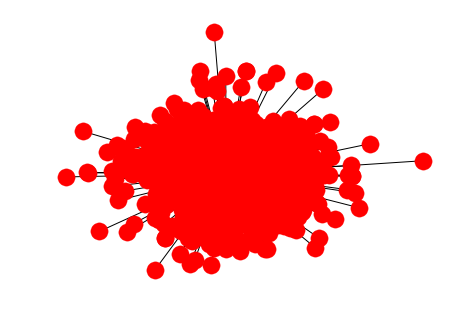

In [65]:
nx.draw_spectral(G)

/Users/206886/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/206886/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/206886/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/206886/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold i

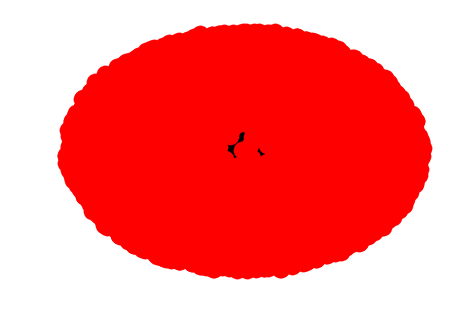

In [56]:
G = nx.random_geometric_graph(200, 0.125)
pos = nx.get_node_attributes(G, 'pos')

dmin = 1
ncenter = 0
for n in pos:
    x,y = pos[n]
    d = (x - 0.5)**2 + (y - 0.5)**2
    if d < dmin:
        ncenter = n
        dmin = d

p = nx.single_source_shortest_path_length(G, ncenter)

edge_trace = Scatter(
    x = [],
    y = [],
    line = Line(width = 0.5,color = '#888'),
    hoverinfo = 'none',
    mode = 'lines')

for edge in G.edges():
    x0, y0 = G.node[edge[0]]['pos']
    x1, y1 = G.node[edge[1]]['pos']
    edge_trace['x'] += [x0, x1, None]
    edge_trace['y'] += [y0, y1, None]

node_trace = Scatter(
    x = [],
    y = [],
    text = [],
    mode = 'markers',
    hoverinfo = 'text',
    marker = Marker(
        showscale=True,
        # colorscale options
        # 'Greys' | 'Greens' | 'Bluered' | 'Hot' | 'Picnic' | 'Portland' |
        # Jet' | 'RdBu' | 'Blackbody' | 'Earth' | 'Electric' | 'YIOrRd' | 'YIGnBu'
        colorscale = 'YIGnBu',
        reversescale = True,
        color = [],
        size = 10,
        colorbar = dict(
            thickness = 15,
            title = 'Node Connections',
            xanchor = 'left',
            titleside = 'right'
        ),
        line = dict(width = 2)))

for node in G.nodes():
    x, y = G.node[node]['pos']
    node_trace['x'].append(x)
    node_trace['y'].append(y)

for node, adjacencies in enumerate(G.adjacency_list()):
    node_trace['marker']['color'].append(len(adjacencies))
    node_info = '# of connections: '+str(len(adjacencies))
    node_trace['text'].append(node_info)

fig = Figure(data = Data([edge_trace, node_trace]),
             layout = Layout(
                title = '<br>Network graph made with Python',
                titlefont = dict(size = 16),
                showlegend = False,
                hovermode = 'closest',
                margin = dict(b = 20, l = 5, r = 5, t = 40),
                annotations=[ dict(
                    text="Python code: <a href='https://plot.ly/ipython-notebooks/network-graphs/'> https://plot.ly/ipython-notebooks/network-graphs/</a>",
                    showarrow = False,
                    xref = "paper", yref = "paper",
                    x=0.005, y=-0.002 ) ],
                xaxis = XAxis(showgrid =False, zeroline = False, showticklabels = False),
                yaxis = YAxis(showgrid =False, zeroline = False, showticklabels = False)))

py.iplot(fig, filename = 'networkx')